<a href="https://colab.research.google.com/github/marcinmichalsmolen/ZUM/blob/main/ZUM3_Marcin_Smolen_s23429poprawione_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


ZUM3 Klasyfikacja obrazów CIFAR-10 Marcin Smoleń s23429 wersja poprawiona

In [2]:
from keras.datasets import cifar10 as dataset
import numpy as np
(x_train, y_train), (x_test, y_test) = dataset.load_data()

170498071/170498071 [==============================] - 7s 0us/step


In [3]:
print("x_train: {}, y_train: {}", x_train.shape, y_train.shape)
print("x_test: {}, y_test: {}", x_test.shape, y_test.shape)

x_train: {}, y_train: {} (50000, 32, 32, 3) (50000, 1)
x_test: {}, y_test: {} (10000, 32, 32, 3) (10000, 1)


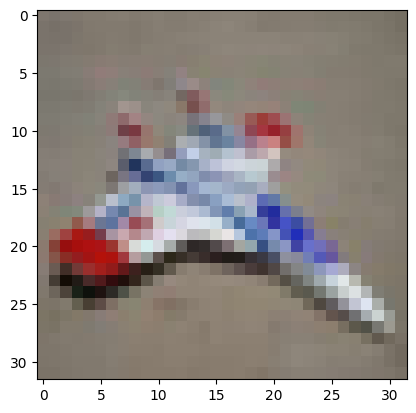

In [4]:
import matplotlib.pyplot as plt
plt.imshow(x_train[30])

Klasyfikacja SVM'em

In [5]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]))

Normalizacja

In [6]:
x_train = x_train/255.0
x_test = x_test/255.0
x_train = x_train.reshape(x_train.shape[0], 32*32*3)
x_test = x_test.reshape(x_test.shape[0], 32*32*3)

In [7]:
sample_size = 5000
x_train=x_train[:sample_size,:]
x_test=x_test[:sample_size,:]
y_train=y_train[:sample_size]
y_test=y_test[:sample_size]

In [8]:
from sklearn import svm
classifier = svm.SVC(kernel='poly', gamma=0.1)
classifier.fit(x_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma=0.1, kernel='poly')

In [9]:
y_pred = classifier.predict(x_test)

In [10]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(accuracy_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

0.3948
[[233  39  58  15  23  22  13  40  88  41]
 [ 14 239   9  18  12  15  13  14  41 102]
 [ 52  20 175  69  92  66  71  48  14  17]
 [ 17  25  39 129  35 102  79  38  20  34]
 [ 21  19  81  40 202  41  73  52  17  17]
 [ 12  17  33 114  34 144  28  49  12  13]
 [ 11  18  54  36  51  36 177   7   4  18]
 [ 24  16  33  36  32  33  12 208   7  26]
 [ 73  32  17  15  18  12  10  16 276  54]
 [ 31  80  13  25   8  17  15  23  25 191]]


Klasyfikacja CNN'em

In [11]:
from keras.datasets import cifar10 as dataset
from tensorflow.keras.utils import to_categorical
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from matplotlib import pyplot
from keras.callbacks import EarlyStopping

In [12]:
def load_data():
  (x_train, y_train), (x_test, y_test) = dataset.load_data()
  y_train = to_categorical(y_train)
  y_test = to_categorical(y_test)
  return x_train, y_train, x_test, y_test

In [13]:
def normalize_pixels(tmp_train, tmp_test):
	# Zamiana na zmiennoprzecinkowe
	x_train = tmp_train.astype('float32')
	x_test = tmp_test.astype('float32')
	# Normalizacja
	x_train = x_train / 255.0
	x_test = x_test / 255.0
	return x_train, x_test

Sieć CNN nr 1 (najprostsza)

In [14]:
def define_model_1():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
	model.add(MaxPooling2D((2, 2)))
 
	model.add(Flatten())
 
	model.add(Dense(128, activation='relu'))
	model.add(Dense(10, activation='softmax'))
 
	model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
	return model

Sieć CNN nr 2 (dodatkowa warstwa Conv2D i Dense)

In [15]:
def define_model_2():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.25))
	model.add(Flatten())
	model.add(Dense(128, activation='relu'))
	model.add(Dense(10, activation='softmax'))

	model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
	return model

Sieć CNN nr 3 (więcej warstw Dense i dodatkowy Dropout)

In [16]:
def define_model_3():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.25))
	model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.25))
	model.add(Flatten())
	model.add(Dense(512, activation='relu'))
	model.add(Dropout(0.25))
	model.add(Dense(128, activation='relu'))
	model.add(Dense(10, activation='softmax'))
 
	model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [17]:
def summarize_diagnostics(history):
  pyplot.title('Dokładność klasyfikacji')
  pyplot.plot(history.history['accuracy'], color='orange', label='train')
  pyplot.plot(history.history['val_accuracy'], color='green', label='test')
  pyplot.subplots_adjust (right=2)
  pyplot.show()

Ładowanie obrazków, dodanie early stopping

In [18]:
x_train, y_train, x_test, y_test = load_data()

x_train, x_test = normalize_pixels(x_train, x_test)

callbacks = EarlyStopping(monitor='val_loss', mode='min', patience=3)

model_1 = define_model_1()
model_2 = define_model_2()
model_3 = define_model_3()


In [19]:
def run_model(model_number):
  output = model_number.fit(x_train, y_train, epochs=100, batch_size=1024, validation_split=(0.2),callbacks=[callbacks])
  # evaluate model
  _, acc = model_number.evaluate(x_test, y_test)
  print('Accuracy = %.3f' % (acc * 100.0))
  summarize_diagnostics(output)
  return

Epoch 1/100
40/40 [==============================] - 12s 34ms/step - loss: 2.0577 - accuracy: 0.2744 - val_loss: 1.8128 - val_accuracy: 0.3562
Epoch 2/100
40/40 [==============================] - 1s 24ms/step - loss: 1.6876 - accuracy: 0.4093 - val_loss: 1.5999 - val_accuracy: 0.4362
Epoch 3/100
40/40 [==============================] - 1s 26ms/step - loss: 1.5257 - accuracy: 0.4642 - val_loss: 1.5362 - val_accuracy: 0.4609
Epoch 4/100
40/40 [==============================] - 1s 23ms/step - loss: 1.4463 - accuracy: 0.4928 - val_loss: 1.4740 - val_accuracy: 0.4947
Epoch 5/100
40/40 [==============================] - 1s 20ms/step - loss: 1.3841 - accuracy: 0.5165 - val_loss: 1.3857 - val_accuracy: 0.5228
Epoch 6/100
40/40 [==============================] - 1s 20ms/step - loss: 1.3165 - accuracy: 0.5405 - val_loss: 1.3748 - val_accuracy: 0.5180
Epoch 7/100
40/40 [==============================] - 1s 18ms/step - loss: 1.2853 - accuracy: 0.5513 - val_loss: 1.3282 - val_accuracy: 0.5331
Epoch

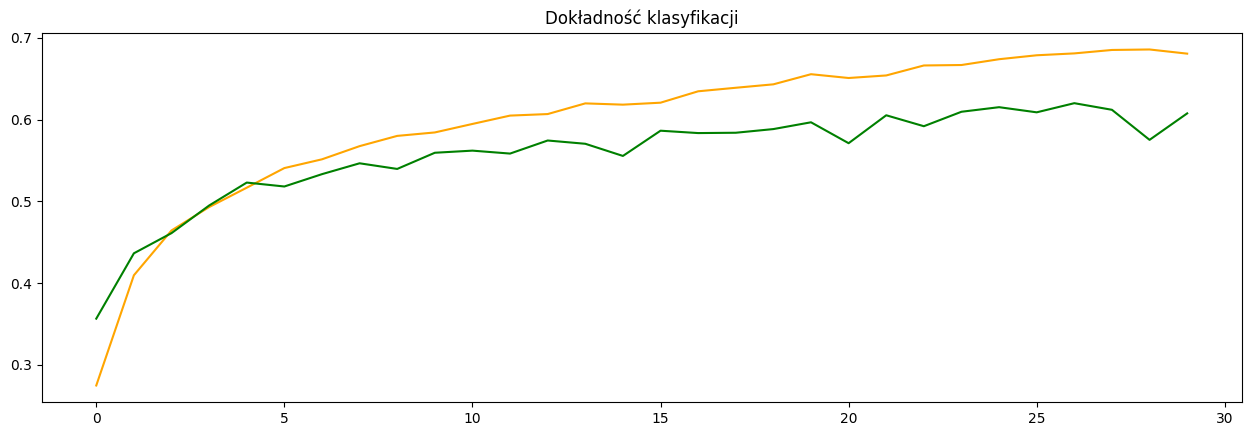

In [20]:
graph_output = run_model(model_1)

Epoch 1/100
40/40 [==============================] - 5s 63ms/step - loss: 1.8515 - accuracy: 0.3418 - val_loss: 1.6325 - val_accuracy: 0.4045
Epoch 2/100
40/40 [==============================] - 2s 45ms/step - loss: 1.4978 - accuracy: 0.4713 - val_loss: 1.4483 - val_accuracy: 0.4868
Epoch 3/100
40/40 [==============================] - 2s 46ms/step - loss: 1.3570 - accuracy: 0.5185 - val_loss: 1.3493 - val_accuracy: 0.5225
Epoch 4/100
40/40 [==============================] - 2s 45ms/step - loss: 1.2565 - accuracy: 0.5564 - val_loss: 1.2773 - val_accuracy: 0.5475
Epoch 5/100
40/40 [==============================] - 2s 45ms/step - loss: 1.1934 - accuracy: 0.5795 - val_loss: 1.1944 - val_accuracy: 0.5905
Epoch 6/100
40/40 [==============================] - 2s 54ms/step - loss: 1.1375 - accuracy: 0.6003 - val_loss: 1.2994 - val_accuracy: 0.5545
Epoch 7/100
40/40 [==============================] - 2s 45ms/step - loss: 1.1129 - accuracy: 0.6101 - val_loss: 1.1749 - val_accuracy: 0.5877
Epoch 

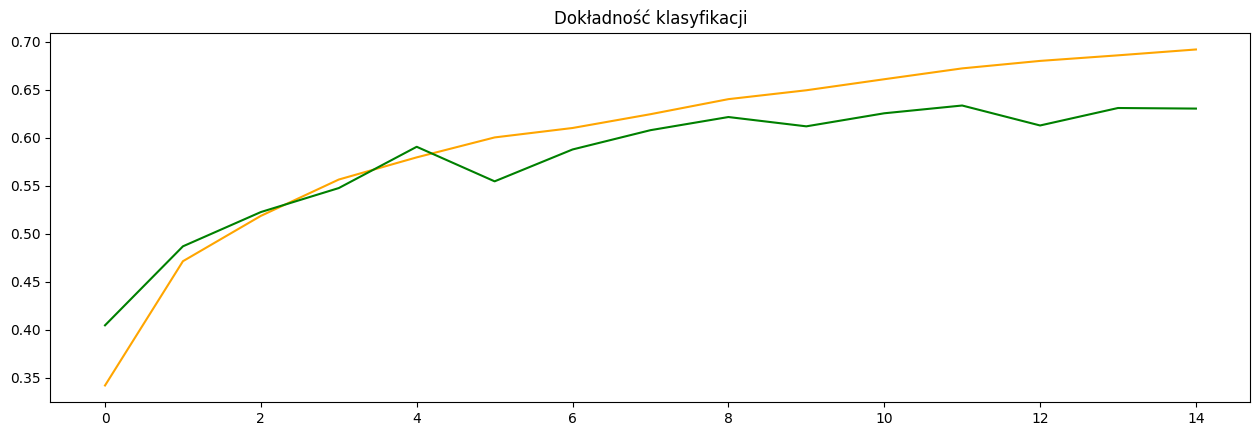

In [21]:
graph_output = run_model(model_2)

In [23]:
def define_model_4():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.25))
	model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.25))
	model.add(Flatten())
	model.add(Dense(512, activation='relu'))
	model.add(Dropout(0.25))
	model.add(Dense(128, activation='relu'))
	model.add(Dense(10, activation='softmax'))
 
	model.compile(optimizer='adamax', loss='categorical_crossentropy', metrics=['accuracy'])
	return model

Epoch 1/100
40/40 [==============================] - 5s 77ms/step - loss: 2.0472 - accuracy: 0.2456 - val_loss: 1.8300 - val_accuracy: 0.3460
Epoch 2/100
40/40 [==============================] - 3s 63ms/step - loss: 1.7395 - accuracy: 0.3717 - val_loss: 1.6414 - val_accuracy: 0.4163
Epoch 3/100
40/40 [==============================] - 2s 62ms/step - loss: 1.5908 - accuracy: 0.4255 - val_loss: 1.5336 - val_accuracy: 0.4511
Epoch 4/100
40/40 [==============================] - 2s 62ms/step - loss: 1.5092 - accuracy: 0.4482 - val_loss: 1.4679 - val_accuracy: 0.4771
Epoch 5/100
40/40 [==============================] - 3s 65ms/step - loss: 1.4476 - accuracy: 0.4739 - val_loss: 1.4086 - val_accuracy: 0.5004
Epoch 6/100
40/40 [==============================] - 2s 62ms/step - loss: 1.3932 - accuracy: 0.4983 - val_loss: 1.3610 - val_accuracy: 0.5195
Epoch 7/100
40/40 [==============================] - 3s 70ms/step - loss: 1.3517 - accuracy: 0.5165 - val_loss: 1.3377 - val_accuracy: 0.5318
Epoch 

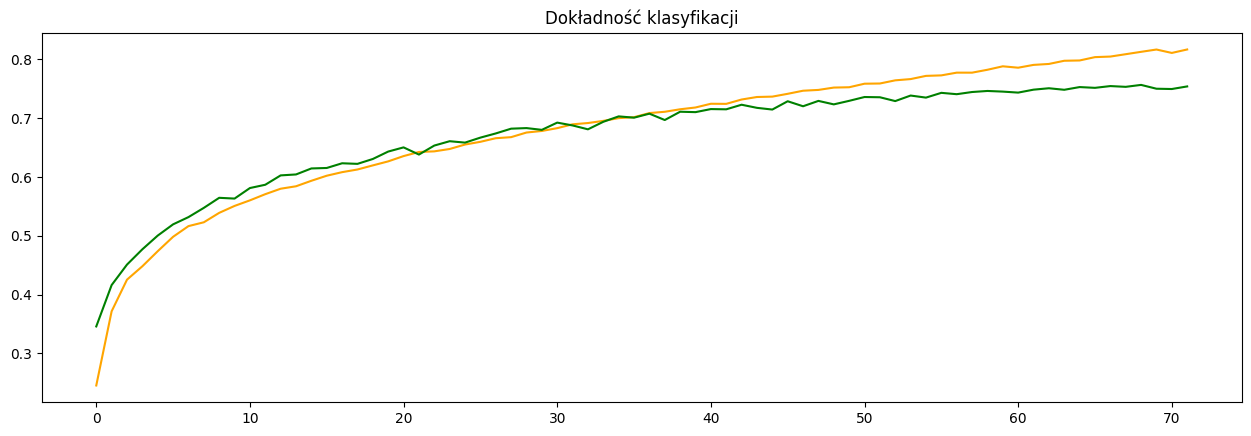

In [25]:
model_4 = define_model_4()
graph_output = run_model(model_4)

In [26]:
def define_model_5():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.25))
	model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.25))
	model.add(Flatten())
	model.add(Dense(512, activation='relu'))
	model.add(Dropout(0.25))
	model.add(Dense(128, activation='relu'))
	model.add(Dense(10, activation='softmax'))
 
	model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])
	return model

Epoch 1/100
40/40 [==============================] - 5s 77ms/step - loss: 2.3111 - accuracy: 0.1054 - val_loss: 2.2969 - val_accuracy: 0.1084
Epoch 2/100
40/40 [==============================] - 3s 64ms/step - loss: 2.3038 - accuracy: 0.1080 - val_loss: 2.2933 - val_accuracy: 0.1181
Epoch 3/100
40/40 [==============================] - 3s 63ms/step - loss: 2.2999 - accuracy: 0.1112 - val_loss: 2.2905 - val_accuracy: 0.1297
Epoch 4/100
40/40 [==============================] - 3s 66ms/step - loss: 2.2956 - accuracy: 0.1160 - val_loss: 2.2872 - val_accuracy: 0.1322
Epoch 5/100
40/40 [==============================] - 3s 65ms/step - loss: 2.2934 - accuracy: 0.1165 - val_loss: 2.2839 - val_accuracy: 0.1363
Epoch 6/100
40/40 [==============================] - 2s 60ms/step - loss: 2.2898 - accuracy: 0.1215 - val_loss: 2.2806 - val_accuracy: 0.1428
Epoch 7/100
40/40 [==============================] - 2s 61ms/step - loss: 2.2863 - accuracy: 0.1262 - val_loss: 2.2771 - val_accuracy: 0.1459
Epoch 

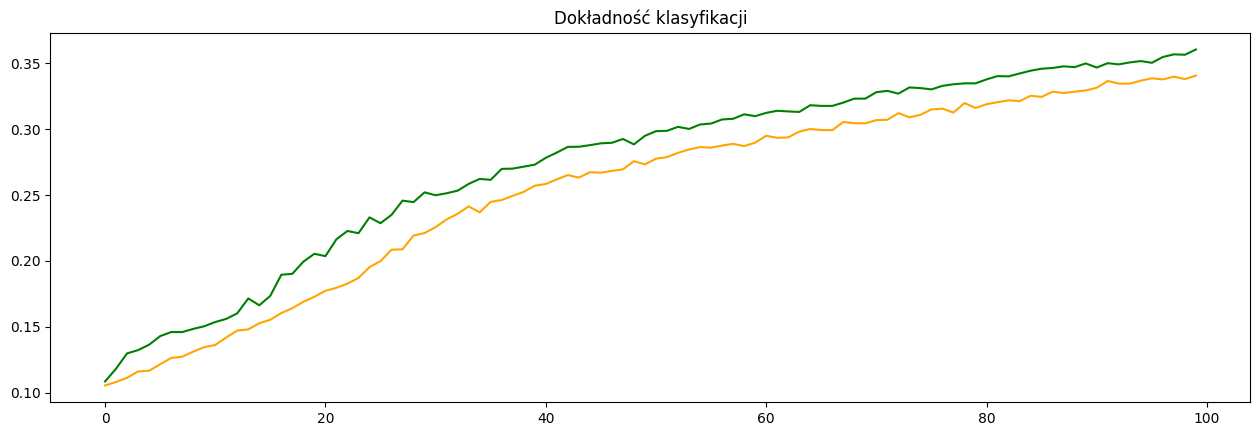

In [27]:
model_5 = define_model_5()
graph_output = run_model(model_5)

Epoch 1/100
40/40 [==============================] - 7s 83ms/step - loss: 1.9340 - accuracy: 0.2958 - val_loss: 1.6877 - val_accuracy: 0.3919
Epoch 2/100
40/40 [==============================] - 2s 60ms/step - loss: 1.5693 - accuracy: 0.4355 - val_loss: 1.4404 - val_accuracy: 0.4905
Epoch 3/100
40/40 [==============================] - 2s 60ms/step - loss: 1.3893 - accuracy: 0.5002 - val_loss: 1.3253 - val_accuracy: 0.5348
Epoch 4/100
40/40 [==============================] - 3s 64ms/step - loss: 1.2866 - accuracy: 0.5440 - val_loss: 1.2058 - val_accuracy: 0.5809
Epoch 5/100
40/40 [==============================] - 3s 66ms/step - loss: 1.1833 - accuracy: 0.5778 - val_loss: 1.1859 - val_accuracy: 0.5780
Epoch 6/100
40/40 [==============================] - 3s 64ms/step - loss: 1.1224 - accuracy: 0.5991 - val_loss: 1.1315 - val_accuracy: 0.6012
Epoch 7/100
40/40 [==============================] - 2s 60ms/step - loss: 1.0740 - accuracy: 0.6191 - val_loss: 1.0583 - val_accuracy: 0.6324
Epoch 

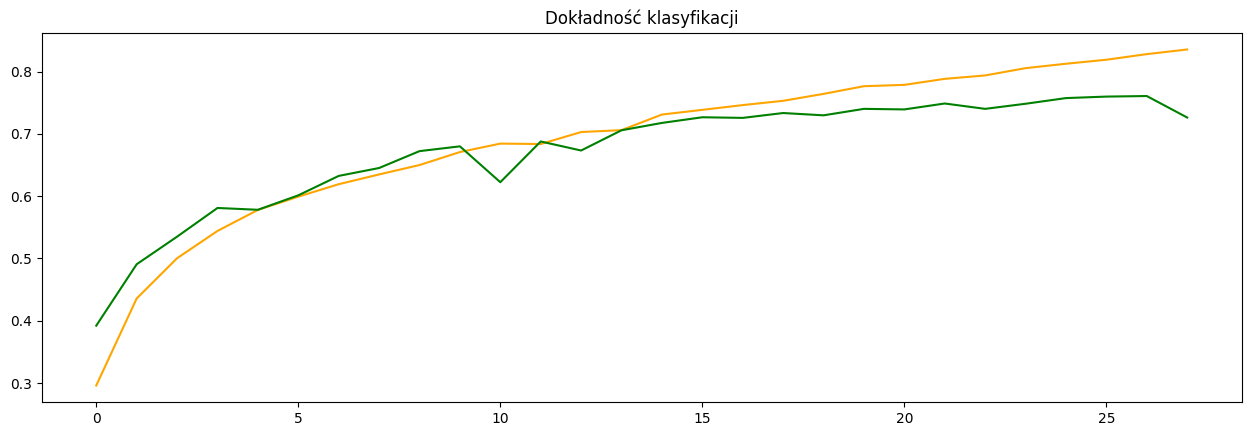

In [22]:
graph_output = run_model(model_3)